In [1]:
import time

from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt


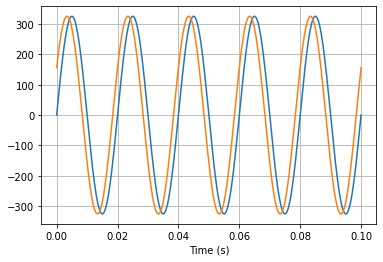

In [2]:
ts = 1e-3
t_end = 0.1
steps = int(1/ts)
t = np.linspace(0, t_end, steps)

f0 = 50
V_eff = 230 *np.sqrt(2)

v_sin1 = V_eff * np.sin(2*np.pi * f0 * t)
v_sin2 = V_eff * np.sin(2*np.pi * f0 * t + 0.5)
plt.plot(t, v_sin1)
plt.plot(t, v_sin2)
plt.xlabel('Time (s)')
plt.grid()
#plt.ylim(225, 235)
#plt.legend()
plt.show()

R = 0.4
L = 2.3e-3
C = 10e-6

LT = 2.3e-3

R_load = 14

In [4]:

#   Initialize Model empty model as m
m = GEKKO(remote=False)

#Input
vi1 = m.Param(value=230)
vi2 = m.Param(value=230)
#vi1 = m.Param(value=v_sin1)#230)
#vi2 = m.Param(value=v_sin2)#230)

# Mdoel params
R1 = m.Param(value=R)
L1 = m.Param(value=L)
C1 = m.Param(value=C)
RT1 = m.Param(value=R)
LT1 = m.Param(value=LT)

R2 = m.Param(value=R)
L2 = m.Param(value=L)
C2 = m.Param(value=C)
RT2 = m.Param(value=R)
LT2 = m.Param(value=LT)

RLoad = m.Param(value=R_load)
iLoad = m.Var(value=0)

v1 = m.Var(value=0)
i1 = m.Var(value=0)
v2 = m.Var(value=0)
i2 = m.Var(value=0)
iT1 = m.Var(value=0)
iT2 = m.Var(value=0)

# DGLs node1
m.Equation(i1.dt() == (vi1 - v1)/L1 - R1/L1 * i1)
m.Equation(v1.dt() == (i1 - iT1)/C1)
m.Equation(iT1.dt() == v1 / LT1 - RT1 / LT1 * iT1 - RLoad / LT1 * iLoad)
# 37 will be replaced by: (and line 48 & line 25 deleted!)
#m.Equation(iT1.dt() == v1 / LT1 - RT1 / LT1 * iT1 - RLoad / LT1 * (iT1 + iT2))

# DGLs node2
m.Equation(i2.dt() == (vi2 - v2)/L2 - R2/L2 * i2)
m.Equation(v2.dt() == (i2 - iT2)/C1)
m.Equation(iT2.dt() == v2 / LT2 - RT2 / LT2 * iT2 - RLoad / LT2 * iLoad)
# 42 will be replaced by:
#m.Equation(iT2.dt() == v2 / LT2 - RT2 / LT2 * iT2 - RLoad / LT2 * (iT1 + iT2))
# constraints
m.Equation(iLoad == iT1 + iT2)

m.options.IMODE = 7  # oder 4?
m.time = t # time points

In [5]:
start = time.time()
m.solve()
end = time.time()
elapsed_time = end - start

print(f'Time for solving: {elapsed_time}')

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           20
   Intermediates:            0
   Connections  :            0
   Equations    :            7
   Residuals    :            7
 
 Number of state variables:             13
 Number of total equations: -           13
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Sequential Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  2.65604E-30  1.95312E+02
    1  2.65604E-30  1.95312E+02
 Successfu

In [6]:
%%time

m.solve()


 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           20
   Intermediates:            0
   Connections  :            0
   Equations    :            7
   Residuals    :            7
 
 Number of state variables:             13
 Number of total equations: -           13
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Sequential Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.46782E-30  2.50775E-09
    1  1.46782E-30  2.50775E-09
 Successfu

In [7]:
%%time
a = 1

CPU times: user 8 µs, sys: 3 µs, total: 11 µs
Wall time: 18.1 µs


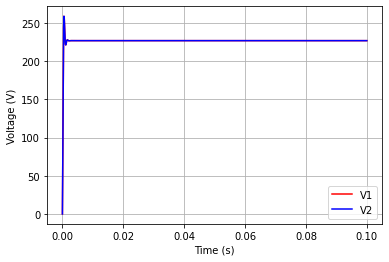

No handles with labels found to put in legend.


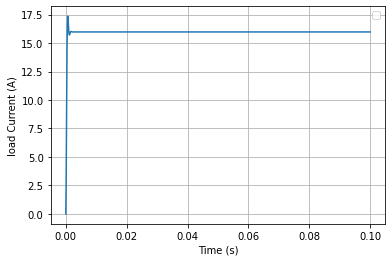

In [6]:
plt.plot(m.time, v1, 'r', label='V1')
plt.plot(m.time, v2, 'b', label='V2')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid()
#plt.ylim(225, 235)
plt.legend()
plt.show()

plt.plot(m.time, iLoad)
plt.xlabel('Time (s)')
plt.ylabel('load Current (A)')
plt.grid()
#plt.ylim(225, 235)
plt.legend()
plt.show()